# Milestone 2 Phase 1

Muhammad Galang Al-Hakim

HCK-004

# Problem Statement

Membuat model dengan supervised learning untuk memprediksi kemungkinan seseorang pasien terindikasi jantung, namun terdeteksi sebagai pasien sehat. 
- 1 = Terindikasi jantung
- 0 = Sehat

# Import Library

In [ ]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif
from feature_engine.outliers import Winsorizer


#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

#evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#save model
import pickle

# Data Loading

In [ ]:
df =pd.read_csv('heart.csv')
df

In [ ]:
df.head()

In [ ]:
df.tail()

- Age: usia pasien  [tahun]
- Sex: jenis kelamin pasien [M: Male, F: Female]
- ChestPainType: tipe sakit dada [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: tekanan darah saat istirahat [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: gula darah saat puasa [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: elektrokardiogram istirahat - -results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: detak jantung maksimum tercapai [Numeric value between 60 and 202]
- ExerciseAngina: angina akibat olahraga [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: (Target)  [1: terindikasi penyakit jantung, 0: Sehat]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

In [ ]:
df.duplicated()

# Exploration Data Analysis

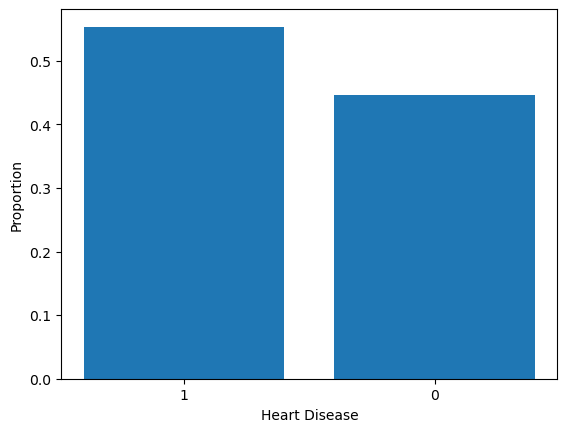

In [ ]:
prop_heart_disease = df['HeartDisease'].value_counts(normalize=True)

plt.bar(prop_heart_disease.index.astype(str), prop_heart_disease)
plt.ylabel('Proportion')
plt.xlabel('Heart Disease')
plt.show()

Data diatas menunjukan sebagian besar pasien terindikasi penyakit jantung dibandingkan dengan pasien yang sehat.

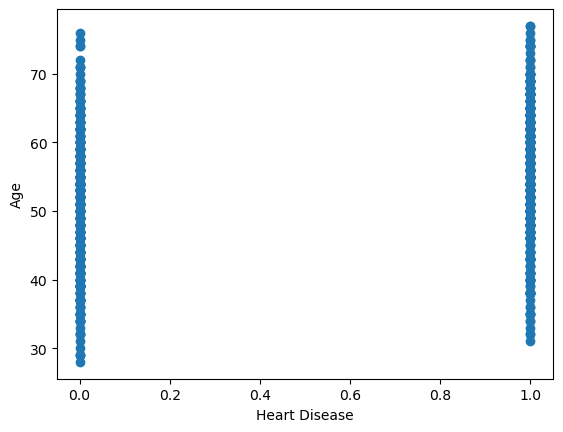

In [ ]:
plt.scatter(df['HeartDisease'], df['Age'])
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

Data diatas menunjukan sebaran usia  pasien yang sehat maupun terindikasi jantung.

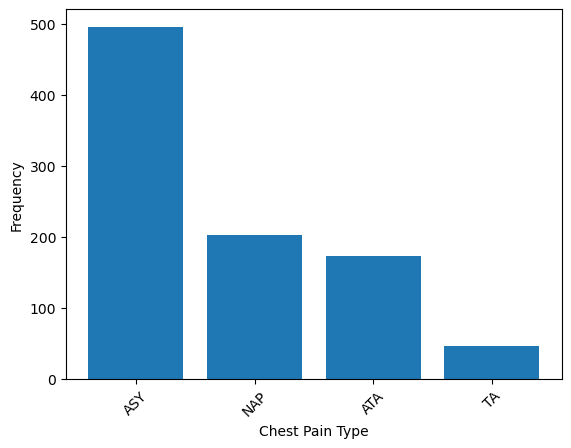

In [ ]:
cp_types = df['ChestPainType'].value_counts()

plt.bar(cp_types.index.astype(str), cp_types)
plt.xticks(rotation=45)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

Data diatas di dominasi oleh tipe sakit dada ASY, NAP, ATA dan TA.

Tipe sakit dada :
- ASY = Asymptomatic
- TA  = Typical Angina
- ATA = Atypical Angina
- NAP = Non-Anginal Pain

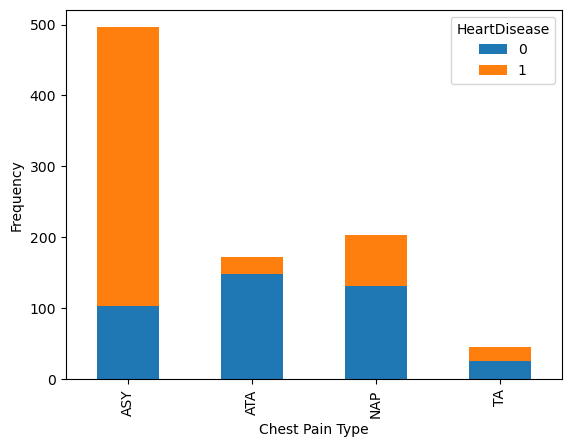

In [ ]:
cp_hd = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()

cp_hd.plot(kind='bar', stacked=True)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

sebaran data tipe sakit dada yang dialami pasien terindikasi jantung maupun pasien sehat dan di dominasi oleh pasien terindikasi jantung dengan tipe sakit dada ASY.

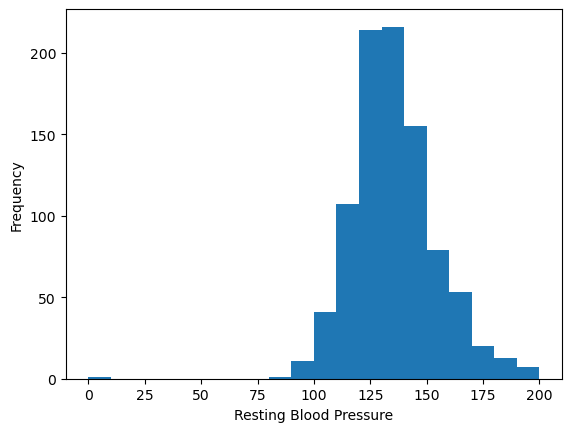

In [ ]:
plt.hist(df['RestingBP'], bins=20)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()

Resting blood pressure pasien terbanyak pada range 125 - 150 mm Hg

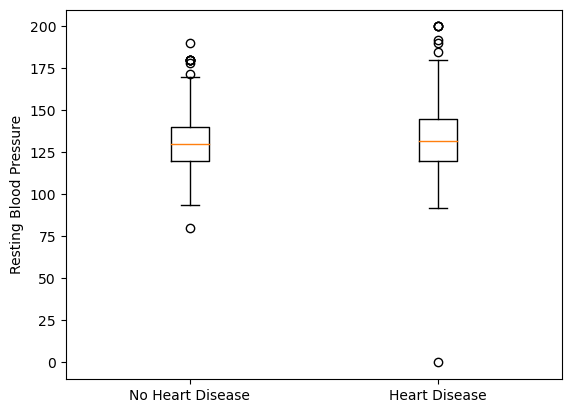

In [ ]:
plt.boxplot([df[df['HeartDisease'] == 0]['RestingBP'], df[df['HeartDisease'] == 1]['RestingBP']])
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])
plt.ylabel('Resting Blood Pressure')
plt.show()

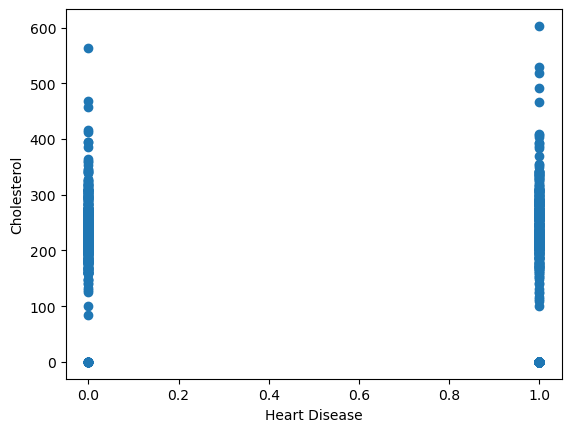

In [ ]:
plt.scatter(df['HeartDisease'], df['Cholesterol'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

sebaran data koleterol berdasarkan pasien terindikasi jantung dan juga pasien sehat.

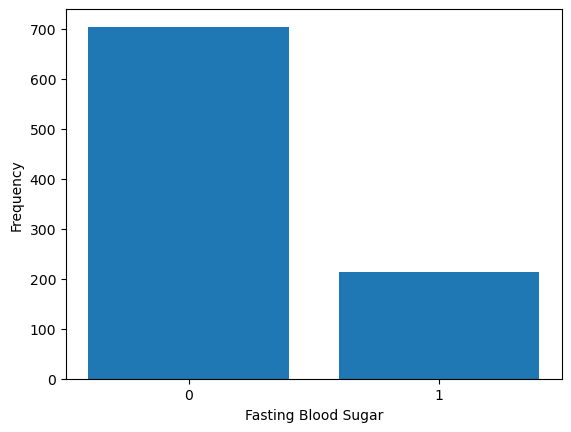

In [ ]:
fbg = df['FastingBS'].value_counts()

plt.bar(fbg.index.astype(str), fbg)
plt.xticks(rotation=0)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.show()

gula darah puasa pasien sehat menunjukan data yang lebih tinggi dibanding dengan pasien terindikasi jantung.

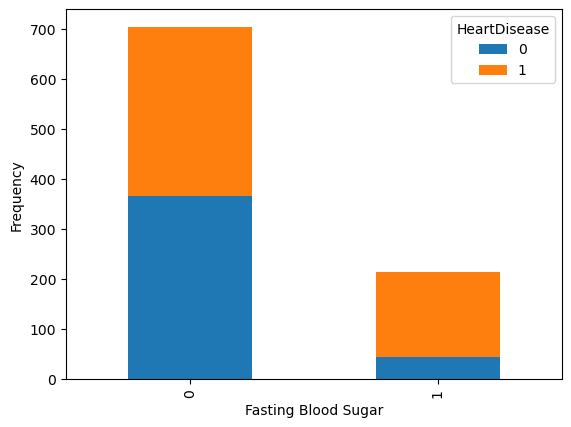

In [ ]:
fbg_hd = df.groupby(['FastingBS', 'HeartDisease']).size().unstack()

fbg_hd.plot(kind='bar', stacked=True)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.show()

pembagian pasien sehat dan pasien terindikasi jantung berdasarkan gula darah puasa.

# Feature Enginering

In [ ]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

melakukan data spliting dengan mendrop kolom target.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (918, 11) (918,) 
Training set  --->  (734, 11) (734,) 
Testing set   --->  (184, 11)  (184,)


In [ ]:
X_train

In [ ]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

# Encoding

In [ ]:
le = LabelEncoder()

X_train1['Sex'] = le.fit_transform(X_train1['Sex'])
X_train1['ChestPainType'] = le.fit_transform(X_train1['ChestPainType'])
X_train1['FastingBS'] = le.fit_transform(X_train1['FastingBS'])
X_train1['RestingECG'] = le.fit_transform(X_train1['RestingECG'])
X_train1['ExerciseAngina'] = le.fit_transform(X_train1['ExerciseAngina'])
X_train1['ST_Slope'] = le.fit_transform(X_train1['ST_Slope'])

In [ ]:
X_test1['Sex'] = le.fit_transform(X_test1['Sex'])
X_test1['ChestPainType'] = le.fit_transform(X_test1['ChestPainType'])
X_test1['FastingBS'] = le.fit_transform(X_test1['FastingBS'])
X_test1['RestingECG'] = le.fit_transform(X_test1['RestingECG'])
X_test1['ExerciseAngina'] = le.fit_transform(X_test1['ExerciseAngina'])
X_test1['ST_Slope'] = le.fit_transform(X_test1['ST_Slope'])

# Feature Selection

melakakukan fitur selection menggunakan SelectKBest

In [ ]:
# Select the k best features
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X_train1, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train1.columns[selected_indices]

# Print the selected features
print(selected_features)

Index(['ChestPainType', 'MaxHR', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
selected_features = ['ChestPainType', 'MaxHR', 'ExerciseAngina', 'ST_Slope']

In [ ]:
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

In [ ]:
X_train_new

In [ ]:
num_col = ['MaxHR']
cat_col = ['ChestPainType', 'ExerciseAngina', 'ST_Slope']

In [ ]:
X_train_new[num_col].skew()

mengecek skewness pada kolom nomor pada X_train_new

# Pipeline

In [ ]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_ss = num_pipeline.fit_transform(X_train_new[['MaxHR']])

In [ ]:
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['ChestPainType', 'ExerciseAngina', 'ST_Slope']])

In [ ]:
full_pipeline = ColumnTransformer([
        ("num_ss", num_pipeline, ['MaxHR']),
        ("cat_tr", cat_pipeline, ['ChestPainType', 'ExerciseAngina', 'ST_Slope'])
    ])

train_tr = full_pipeline.fit_transform(X_train_new)

# Model Definition &  Model Training

In [ ]:
## Membuat Pipeline untuk memproses numerical features seperti yang dilakukan di data preprocess
# untuk numerical dengan normal distribution
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

# untuk numerical dengan skewed distribution
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False)) #turbidity
    ])
    
# Menggabungkan semua pipeline yang telah dibuat ke full_pipeline
full_pipeline = ColumnTransformer([
        ("num_ss", num_pipeline, ['MaxHR']),
        ("cat_tr", cat_pipeline, ['ChestPainType', 'ExerciseAngina', 'ST_Slope'])
    ])

# define the models to be applied in the pipeline
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier()]

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, adaboost, and xgboost models
pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', None)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score

for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train_new, y_train, cv=skf)
    print(f'{type(model).__name__} recall: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')

LogisticRegression recall: 0.842 (+/- 0.025)
DecisionTreeClassifier recall: 0.777 (+/- 0.021)


SVC recall: 0.827 (+/- 0.029)


RandomForestClassifier recall: 0.794 (+/- 0.013)
GaussianNB recall: 0.827 (+/- 0.022)


KNeighborsClassifier recall: 0.817 (+/- 0.021)


AdaBoostClassifier recall: 0.815 (+/- 0.025)


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters for each model
logreg_params = {'classifier__solver':['lbfgs','liblinier'],
                 'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.01, 0.1, 1, 10, 100]}

dt_params = {'classifier__criterion': ['gini', 'entropy'], 
             'classifier__max_depth': [5, 10, 15, 20, None],
             'classifier__min_samples_split': [2, 5, 10, 15]}

svm_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'rbf','poly']}

rf_params = {'classifier__n_estimators': [100, 300],
             'classifier__max_depth': [5, 10, 15, 20],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__max_features': ['auto', 'sqrt']}

nb_params = {}

knn_params = {'classifier__n_neighbors': [5, 10, 15, 20], 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

ada_params = {'classifier__n_estimators': [50, 100, 150], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10]}

# create a dictionary of hyperparameters for each model
param_grid = {
    'LogisticRegression': logreg_params,
    'DecisionTreeClassifier': dt_params,
    'SVM': svm_params,
    'RandomForestClassifier': rf_params,
    'GaussianNB': nb_params,
    'KNeighborsClassifier': knn_params,
    'AdaBoostClassifier': ada_params,
}

# create a dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# loop through each model and its corresponding hyperparameters to perform grid search cross-validation
for model_name, model in models.items():
    pipeline.set_params(classifier=model)
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=skf, scoring='recall')
        grid_search.fit(X_train_new, y_train)
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        print(f'{model_name} Best Score: {grid_search.best_score_}')
        print(f'{model_name} Recall score:{grid_search.cv_results_["mean_test_score"].mean()}')

LogisticRegression Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
LogisticRegression Best Score: 0.8597711532670882
LogisticRegression Recall score:nan


DecisionTreeClassifier Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
DecisionTreeClassifier Best Score: 0.866967780788919
DecisionTreeClassifier Recall score:0.8240447154471546


SVM Best Parameters: {'classifier__C': 0.01, 'classifier__kernel': 'poly'}
SVM Best Score: 0.9262571514604033
SVM Recall score:0.8743189802268393


RandomForestClassifier Best Parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 15, 'classifier__n_estimators': 100}
RandomForestClassifier Best Score: 0.8768142125865703
RandomForestClassifier Recall score:0.8559964054501655
GaussianNB Best Parameters: {}
GaussianNB Best Score: 0.8129479072568504
GaussianNB Recall score:0.8129479072568504


KNeighborsClassifier Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}
KNeighborsClassifier Best Score: 0.8720264980427581
KNeighborsClassifier Recall score:0.847144120746763


AdaBoostClassifier Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
AdaBoostClassifier Best Score: 0.8621198434206564
AdaBoostClassifier Recall score:0.6697982535380907


## Best Parameter Model Training

In [ ]:
## Membuat Pipeline untuk memproses numerical features seperti yang dilakukan di data preprocess
# untuk numerical dengan normal distribution
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

# untuk numerical dengan skewed distribution
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False)) #turbidity
    ])
    
# Menggabungkan semua pipeline yang telah dibuat ke full_pipeline
full_pipeline = ColumnTransformer([
        ("num_ss", num_pipeline, ['MaxHR']),
        ("cat_tr", cat_pipeline, ['ChestPainType', 'ExerciseAngina', 'ST_Slope'])
    ])

# define the models to be applied in the pipeline
models = [SVC(C= 0.01, kernel= 'poly', random_state=42)]

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, adaboost, and xgboost models
pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', None)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score

for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train_new, y_train, cv=skf, scoring='recall')
    print(f'{type(model).__name__} recall: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')

SVC recall: 0.926 (+/- 0.033)


# Model Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       328
           1       0.82      0.90      0.86       406

    accuracy                           0.84       734
   macro avg       0.84      0.83      0.83       734
weighted avg       0.84      0.84      0.83       734

ROC AUC Score: 0.8269704433497537

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        82
           1       0.81      0.89      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184

ROC AUC Score: 0.8180296508847441


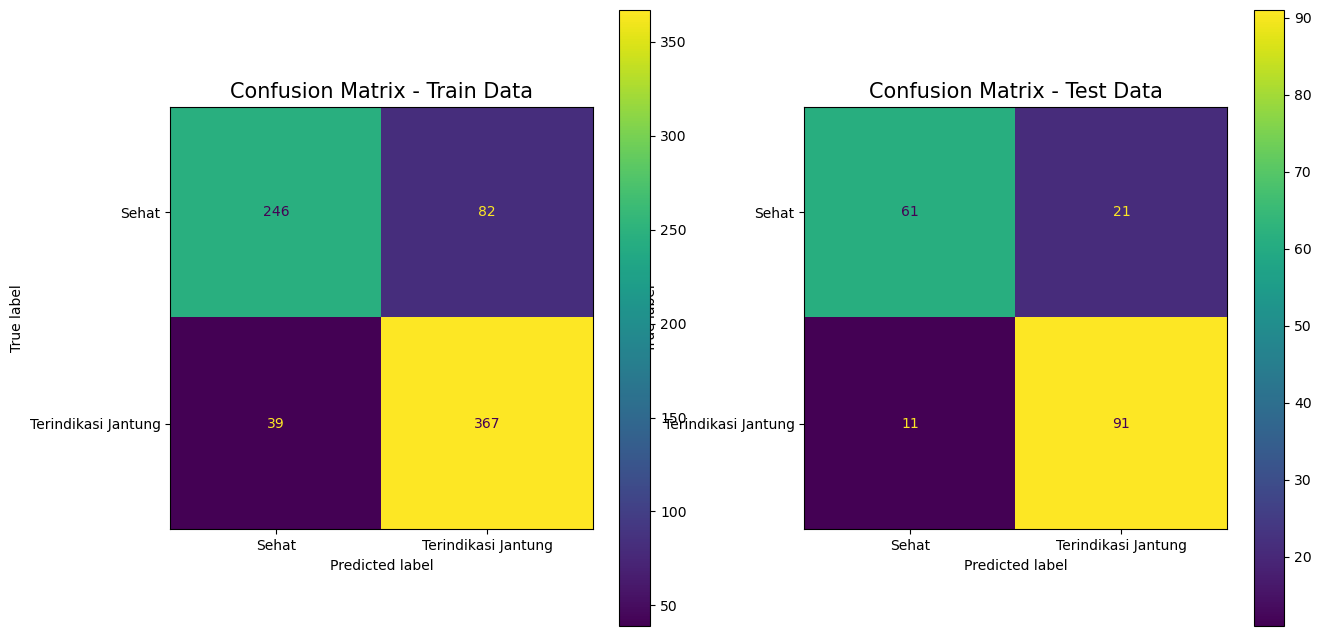

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline.set_params(classifier=SVC(C=0.01, kernel= 'poly', random_state=42))
pipeline.fit(X_train_new, y_train)

# make predictions on the test data
y_pred1 = pipeline.predict(X_train_new)

# make predictions on the test data
y_pred2 = pipeline.predict(X_test_new)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Sehat','Terindikasi Jantung'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Sehat','Terindikasi Jantung'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## Final Pipeline

In [ ]:
# define the preprocessing steps for categorical and numerical columns
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

# create the column transformer to apply the preprocessing steps to the data
full_pipeline = ColumnTransformer([
        ("num_ss", num_pipeline, ['MaxHR']),
        ("cat_tr", cat_pipeline, ['ChestPainType', 'ExerciseAngina', 'ST_Slope'])
    ])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
final_pipeline = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", SVC(C = 0.01, kernel='poly', random_state=42))
])

#Evaluate the Final Pipeline Accuracy
final_pipeline.fit(X_train, y_train)
hasil = final_pipeline.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        82
           1       0.81      0.89      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



# Model Saving

In [ ]:
#Membuat model yang baru
with open('final_pipeline.pkl', 'wb') as f:
    
# Save the object to the file
    pickle.dump(final_pipeline, f)

# Model Inference

In [ ]:
with open('final_pipeline.pkl' , 'rb') as f:
    final_pipeline.pkl = pickle.load(f)

In [ ]:
final_pipeline

Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('num_ss',
 Pipeline(steps=[('outlier',
 Winsorizer(tail='both')),
 ('scaler',
 StandardScaler())]),
 ['MaxHR']),
 ('cat_tr',
 Pipeline(steps=[('ohe_enc',
 OneHotEncoder(sparse=False))]),
 ['ChestPainType',
 'ExerciseAngina',
 'ST_Slope'])])),
 ('classification',
 SVC(C=0.01, kernel='poly', random_state=42))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('num_ss',
 Pipeline(steps=[('outlier',
 Winsorizer(tail='both')),
 ('scaler',
 StandardScaler())]),
 ['MaxHR']),
 ('cat_tr',
 Pipeline(steps=[('ohe_enc',
 OneHotEncoder(sparse=False))]),
 ['ChestPainType',
 'ExerciseAngina',
 'ST_Slope'])])),
 ('classification',
 SVC(C=0.01, kernel='poly', random_state=42))]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('num_ss',
 Pipeline(steps=[('outlier',
 Winsorizer(tail='both')),
 ('scaler', StandardScaler())]),
 ['MaxHR']),
 ('cat_tr',
 Pipeline(steps=[('ohe_enc',
 OneHotEncoder(sparse=False))]),
 ['ChestPainType', 'ExerciseAngina',
 'ST_Slope'])]) num_ss ['MaxHR'] Winsorizer Winsorizer(tail='both') StandardScaler StandardScaler() cat_tr ['ChestPainType', 'ExerciseAngina', 'ST_Slope'] OneHotEncoder OneHotEncoder(sparse=False) SVC SVC(C=0.01, kernel='poly', random_state=42)

In [ ]:
X_train.sample(1)

In [ ]:
# Step 2 Bikin Dataframe baru
a = {'Age':[56],
    'Sex':[1],
    'ChestPainType':['ASY'],
    'RestingBP':[134],
    'Cholesterol':[409],
    'FastingBS':[0],
    'RestingECG':['LVH'],
    'MaxHR':[150],
    'ExerciseAngina':['Y'],
    'Oldpeak':[1.9],
    'ST_Slope':['Flat']}
b = pd.DataFrame(data=a)
b

In [ ]:
result = final_pipeline.predict(b)
result

array([1])

In [ ]:
# Step 4 - Result interpretation
if hasil[0] == 0:
    print('Sehat')  #HeartDisease: NO
elif hasil[0] == 1:
    print('Terindikasi jantung')  #HeartDisease: YES

Terindikasi jantung


# Model Analysis

Saat melakukan cross validation model yang memiliki nilai tertinggi adalah model LogisticRegression, namun saaat di hyperparameter tuning karena memfokuskan pada (FN) jadi kita lihat adalah recall 1 dan yang mendapatkan nilai tertinggi yaitu model SVC 87,4%, pada saat di classification report nilai recall 1 SVC bertambah 2% menjadi 89% model yang digunakan merupakan model good fit.

# Overall Analysis

Pada model supervised Machine Learning yang telah dibuat dengan menggunakan 7 algoritma permodelan, yaitu LogisticRegression, DecisionTreeClassifier, SVC RandomForestClassifier, GaussianNB KNeighborsClassifier, AdaBoostClassifier.
Model yang dibuat adalah untuk memprediksi kemungkinan seseorang pasien terindikasi jantung, namun terdeteksi sebagai pasien sehat (FN) maka kita memfokuskan pada score recall.
Sehingga dapat disimpulkan bahwa analysis ini yang menggunakan metode SVC dapat membuat model prediksi terinidikasinya jantung pada pasien dengan keakuratan yang tinggi.